<a href="https://colab.research.google.com/github/MariaPetrovskaya/Data-Science-for-HR/blob/main/Tech%20Recruiters%20labor%20market%20weekly%20review/24_05_02_Tech_Recruiters_labor_market_weekly_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Еженедельный обзор вакансии для технических рекрутеров на HH

## <font color='3386FF'>Цель</font>
Систематизировать и визуализировать информацию о рынке вакансий для технических рекрутеров, выбрать вакансии по списку нужных критериев

## <font color='3386FF'>Данные</font>
Выгрузка данных по API предоставляемой HH, за период недели

### Инсталляции и импорт библиотек

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import re

In [ ]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=72ec94695137a9d7d72c87286a3ae07f86d8f15ba96e4e0c4252ffae6f9bfa22
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2

In [ ]:
import numpy as np

In [ ]:
from tqdm import notebook

In [ ]:
import plotly.express as px

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import date
# import phik

In [ ]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import names, stopwords, words

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

from nltk.stem import WordNetLemmatizer


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


### Загрузка данных


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/parsers/new recruit_2024-05-01.csv', index_col=False)
df.sample(5) #выведем на экран 5 различных строк с данными

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,description,skills,job_type
30701,Рекрутер,Диплей,Удаленная работа,Новосибирск,NaN,NaN,hh,https://hh.ru/vacancy/97580712,2024-04-27,NaN,NaN,Имеешь успешный опыт в массовом подборе от 1 г...,Полная занятость
45493,ИТ Рекрутер/HR консультант,HR Prime,Полный день,Москва,120000.0,300000.0,hh,https://hh.ru/vacancy/95243386,2024-04-30,NaN,NaN,...кнопок и произносители слов по скрипту. Есл...,Полная занятость
24010,Ведущий рекрутер / ведущий менеджер по подбору...,SKDESIGN (СК ДИЗАЙН),Полный день,Москва,120000.0,130000.0,hh,https://hh.ru/vacancy/97719127,2024-04-25,NaN,NaN,Опыт и знания: Опыт в области подбора персонал...,Полная занятость
3947,Менеджер пункта выдачи заказов,Иктин Групп,Сменный график,Ижевск,38000.0,45500.0,hh,https://hh.ru/vacancy/97598122,2024-04-28,NaN,NaN,Работать с компьютером.,Полная занятость
4754,Бариста,Зайцева Татьяна Александровна,Сменный график,Пенза,40000.0,50000.0,hh,https://hh.ru/vacancy/97800641,2024-04-24,NaN,NaN,Желание работать в нашей команде и развивать с...,Полная занятость


Описание основных столбцов в данных:

`title` - название вакансии;

`company` - нaзвание компании;

`location` - город, где планируется работать согласно вакансии;

`salary_from, salary_to` - верхние и нижние границы заработной платы, если указаны в описании вакансии;

`source` - источник публикации вакансии;

`link` - ссылка на описание вакансии в источнике;

`company_field` - отрасль, в которой работает компания;

`description` - описание вакансии;

`skills` - навыки в описании вакансии;

`job_type`- тип занятости;













In [ ]:
def dataset_info(dataset):
    count = 0
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('Количество уникальных значений: ',dataset[column].nunique())  #отобразит количество уникальных значений
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитает количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество полных строк-дубликатов

In [ ]:
#передадим для анализа наш датасет
dataset_info(df)

Название столбца:      title
Длина столбца:         50002
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['Специалист поддержки пользователей в чате (письменно)'
 'Специалист по подбору персонала' 'Ассистент HR-менеджера' ...
 'Менеджер по обучению и развитию (стоматология, премиальный сегмент)'
 'Ведущий IT рекрутер аналитического трека'
 'Marketing specialist (DIO RUS)']
Количество уникальных значений:  2158
----------------
Название столбца:      company
Длина столбца:         50002
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['Joom' 'Тихвинский вагоностроительный завод (АО ТВСЗ)' 'DKRS' ...
 'HeadHunter' 'Белая радуга'
 'Московское Агентство Недвижимости РАЗВИТИЕ БИЗНЕСА']
Количество уникальных значений:  2589
----------------
Название столбца:      format
Длина столбца:         50002
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['Удаленная работа' 'Полный день' 'Сменный график' 'Гибки

##Предварительная обработка данных

In [ ]:
#проверим колчиество уникальных значений
print('Количество уникальных значений: ',df['title'].nunique())

Количество уникальных значений:  2158


In [ ]:
#посмотрим на топ-20 распространенных наименований вакансий
df['title'].value_counts().head(20)

title
Менеджер по подбору персонала                 5847
Специалист по подбору персонала               3679
Рекрутер                                      2754
Ассистент менеджера по подбору персонала       623
Менеджер по персоналу                          620
HR менеджер                                    555
Ведущий специалист по подбору персонала        445
Младший специалист по подбору персонала        428
Начинающий специалист по подбору персонала     412
Рекрутер (удалённо)                            392
Менеджер по работе с клиентами                 392
Сборщик заказов на склад в ОЗОН                361
Рекрутер (удаленно)                            353
Комплектовщик на склад                         308
Сборщик на склад СберМегаМаркет, Huawei        295
Ведущий менеджер по подбору персонала          252
Помощник менеджера по подбору персонала        206
Сорсер в Плюс Фантех                           204
IT Recruiter                                   198
Менеджер по подбору персо

In [ ]:
#приведем наименование к нижнему регистру
df['title'] = df['title'].astype('str').str.lower()

In [ ]:
#проверим количество уникальных значений после корректировки
print('Количество уникальных значений: ',df['title'].nunique())

Количество уникальных значений:  2085


In [ ]:
#посмотрим на топ-20 распространенных наименований вакансий после корректировки названий
df['title'].value_counts().head(20)

title
менеджер по подбору персонала                 5847
специалист по подбору персонала               3679
рекрутер                                      2754
ассистент менеджера по подбору персонала       623
менеджер по персоналу                          620
hr менеджер                                    572
ведущий специалист по подбору персонала        445
младший специалист по подбору персонала        428
начинающий специалист по подбору персонала     412
рекрутер (удалённо)                            411
рекрутер (удаленно)                            410
менеджер по работе с клиентами                 392
сборщик заказов на склад в озон                361
комплектовщик на склад                         308
менеджер по подбору персонала/рекрутер         299
сборщик на склад сбермегамаркет, huawei        295
it recruiter                                   275
ведущий менеджер по подбору персонала          252
менеджер по подбору персонала / рекрутер       246
it рекрутер              

In [ ]:
#проверим колчиество уникальных значений
print('Количество уникальных значений: ',df['description'].nunique())

Количество уникальных значений:  2841


In [ ]:
# #посмотрим на топ-20 распространенных наименований вакансий
# df['description'].value_counts().head(20)

In [ ]:
#приведем наименование к нижнему регистру
df['description'] = df['description'].astype('str').str.lower()

In [ ]:
#приведем наименование к нижнему регистру
df['skills'] = df['skills'].astype('str').str.lower()

In [ ]:
#проверим колчиество уникальных значений после корректировки
print('Количество уникальных значений: ',df['description'].nunique())

Количество уникальных значений:  2842


In [ ]:
#посмотрим на топ-20 распространенных наименований вакансий после корректировки названий
df['title'].value_counts().head(20)

title
менеджер по подбору персонала                 5847
специалист по подбору персонала               3679
рекрутер                                      2754
ассистент менеджера по подбору персонала       623
менеджер по персоналу                          620
hr менеджер                                    572
ведущий специалист по подбору персонала        445
младший специалист по подбору персонала        428
начинающий специалист по подбору персонала     412
рекрутер (удалённо)                            411
рекрутер (удаленно)                            410
менеджер по работе с клиентами                 392
сборщик заказов на склад в озон                361
комплектовщик на склад                         308
менеджер по подбору персонала/рекрутер         299
сборщик на склад сбермегамаркет, huawei        295
it recruiter                                   275
ведущий менеджер по подбору персонала          252
менеджер по подбору персонала / рекрутер       246
it рекрутер              

In [ ]:
#удалим пробелы в записях
df['description'] = df['description'].str.strip()

In [ ]:
#удалим пробелы в записях
df['skills'] = df['skills'].str.strip()

In [ ]:
print('Количество пропусков: ',df['description'].isna().sum())

Количество пропусков:  0


In [ ]:
df['text']=df['description']+df['skills']

In [ ]:
df

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,description,skills,job_type,text
0,специалист поддержки пользователей в чате (пис...,Joom,Удаленная работа,Москва,45000.0,NaN,hh,https://hh.ru/vacancy/96518758,2024-04-29,NaN,joom marketplace — площадка для покупок товаро...,грамотно пишете и разговариваете на русском яз...,Полная занятость,joom marketplace — площадка для покупок товаро...
1,специалист по подбору персонала,Тихвинский вагоностроительный завод (АО ТВСЗ),Полный день,Тихвин,60000.0,NaN,hh,https://hh.ru/vacancy/97729988,2024-04-23,NaN,на тихвинский вагоностроительный завод требует...,высшее образование. грамотная устная и письмен...,Полная занятость,на тихвинский вагоностроительный завод требует...
2,ассистент hr-менеджера,DKRS,Полный день,Москва,65000.0,NaN,hh,https://hh.ru/vacancy/94295368,2024-04-30,NaN,уникальная возможность для энергичных и амбици...,грамотно выстраиваешь свой рабочий день.,Полная занятость,уникальная возможность для энергичных и амбици...
3,стажер data science,Samokat.tech,Удаленная работа,Москва,NaN,NaN,hh,https://hh.ru/vacancy/97838110,2024-04-24,NaN,привет!на связи продуктово-технологическая ком...,знание основ python. знание основ sql. базовые...,Стажировка,привет!на связи продуктово-технологическая ком...
4,логист/customer service department,PHOENIX CARGO EXPRESS,Полный день,Ташкент,4000000.0,40000000.0,hh,https://hh.ru/vacancy/95481190,2024-04-30,NaN,are you a university student or graduate seeki...,"phoenix cargo seeks 2nd, 3rd and final year st...",Полная занятость,are you a university student or graduate seeki...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,"менеджер по обучению и развитию (стоматология,...",Белая радуга,Полный день,Москва,NaN,NaN,hh,https://hh.ru/vacancy/96467057,2024-04-30,NaN,nan,"релевантный опыт работы минимум 1 год, в идеал...",Полная занятость,"nanрелевантный опыт работы минимум 1 год, в ид..."
49998,ведущий it рекрутер аналитического трека,NAUMEN,Полный день,Санкт-Петербург,NaN,NaN,hh,https://hh.ru/vacancy/96865255,2024-04-28,NaN,nan,для нас важно сохранять баланс качества и скор...,Полная занятость,nanдля нас важно сохранять баланс качества и с...
49999,game ui/ux designer,G5EN KAZ,Удаленная работа,Тбилиси,NaN,NaN,hh,https://hh.ru/vacancy/97829274,2024-04-24,NaN,nan,опыт проектирования игр не менее 2-х лет. умен...,Полная занятость,nanопыт проектирования игр не менее 2-х лет. у...
50000,marketing specialist (dio rus),Торговый Отдел Посольства Республики Корея,Полный день,Москва,80000.0,100000.0,hh,https://hh.ru/vacancy/97202912,2024-04-29,NaN,dio rus company is a seller implants and denta...,bachelor's degree in marketing. proficient in ...,Полная занятость,dio rus company is a seller implants and denta...


## Фильтрация объявлений для технических рекрутеров

In [ ]:
#по сумме текстовых описаний вакансии оставим только те, где есть признаки работы технического рекрутера или квалифицированного рекрутера широкого профиля
df_clear = df[df['text'].str.contains(" tech| it |программ|разраб| high| digital | технич|psychol|психол| тест| huntflow | хантфлоу | hubr | хабр| GitHub | github | автоматиз| talent | generalist ")]

In [ ]:
#выведем новый датасет
df_clear.sample(5)

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,description,skills,job_type,text
36635,менеджер по подбору персонала,"АвтоГЕРМЕС, Группа компаний",Полный день,Москва,120000.0,150000.0,hh,https://hh.ru/vacancy/97810234,2024-04-24,NaN,nan,высшее образование; среднее профессиональное. ...,Полная занятость,nanвысшее образование; среднее профессионально...
38520,телемаркетолог / специалист call-центра,Lenkep recruitment,Удаленная работа,Москва,45000.0,55000.0,hh,https://hh.ru/vacancy/97705849,2024-04-23,NaN,привет! наша компания click.ru ищет кандидата ...,"самостоятельность, коммуникабельность. опыт ра...",Полная занятость,привет! наша компания click.ru ищет кандидата ...
49483,hr-generalist / hr-менеджер,Teamline Consult,Удаленная работа,Москва,100000.0,NaN,hh,https://hh.ru/vacancy/97657102,2024-04-28,NaN,мы в поиске hr generalist ​​​​​​​для компании ...,опыт в hr-менеджменте от 3-х лет. владеешь инс...,Полная занятость,мы в поиске hr generalist ​​​​​​​для компании ...
19137,младший специалист по подбору персонала,Ozon,Сменный график,Махачкала,40000.0,NaN,hh,https://hh.ru/vacancy/97125294,2024-04-30,Ozon Производство,nan,умение обращаться с компьютерными программами ...,Полная занятость,nanумение обращаться с компьютерными программа...
27618,рекрутер/ менеджер по подбору персонала,КЭР-Автоматика,Полный день,Казань,70000.0,80000.0,hh,https://hh.ru/vacancy/98127192,2024-04-29,NaN,ооо «кэр-автоматика»- компания с 20-летним инж...,высшее образование. опыт в подборе технических...,Полная занятость,ооо «кэр-автоматика»- компания с 20-летним инж...


Проверим количество строк, которые были удалены после выделения искомых позиций

In [ ]:
print('Количество строк в первичных данных',df.shape[0])
print('Количество строк в очищенных данных',df_clear.shape[0])
print('Количество удаленных строк',df.shape[0] - df_clear.shape[0])
print('% офильтрованных данных после очистки:',round(df_clear.shape[0]/df.shape[0]*100,2),'%')

Количество строк в первичных данных 50002
Количество строк в очищенных данных 8379
Количество удаленных строк 41623
% офильтрованных данных после очистки: 16.76 %


In [ ]:
#количество уникальных названий вакансий
print('Количество уникальных значений: ',df_clear['company'].nunique())

Количество уникальных значений:  1062


In [ ]:
df_clear['company'].value_counts().head(10)

company
Ozon                                                     839
Яндекс Крауд                                             247
Easy Recruit                                             151
Масленникова Надежда Денисовна                           133
Beget                                                    107
В Кадре                                                   84
СберЛогистика                                             78
Надежда Лебедева HR Kоуч / Трансформационный рекрутер     69
Lenkep recruitment                                        69
Outlines Technologies                                     63
Name: count, dtype: int64

In [ ]:
print('Количество уникальных значений: ',df_clear['title'].nunique())

Количество уникальных значений:  937


In [ ]:
df_clear['title'].value_counts().head(20)

title
менеджер по подбору персонала                 618
специалист по подбору персонала               548
младший специалист по подбору персонала       392
рекрутер                                      340
начинающий специалист по подбору персонала    311
сорсер в плюс фантех                          204
it recruiter                                  188
оператор онлайн-чата                          100
hr менеджер                                    91
ассистент менеджера по подбору персонала       83
сборщик на склад сбермегамаркет, huawei        67
инженер технической поддержки (удаленно)       61
специалист по подбору персонала (рекрутер)     58
менеджер по подбору персонала/рекрутер         57
стажер-рекрутер                                57
it рекрутер                                    54
сборщик заказов на склад в озон                52
менеджер по персоналу                          47
it-рекрутер                                    45
главный специалист по подбору персонала     

In [ ]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8379 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          8379 non-null   object 
 1   company        8379 non-null   object 
 2   format         8379 non-null   object 
 3   location       8379 non-null   object 
 4   salary_from    5175 non-null   float64
 5   salary_to      2677 non-null   float64
 6   source         8379 non-null   object 
 7   link           8379 non-null   object 
 8   date           8379 non-null   object 
 9   company_field  1345 non-null   object 
 10  description    8379 non-null   object 
 11  skills         8379 non-null   object 
 12  job_type       8379 non-null   object 
 13  text           8379 non-null   object 
dtypes: float64(2), object(12)
memory usage: 981.9+ KB


In [ ]:
df_clear.head(5)

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,description,skills,job_type,text
0,специалист поддержки пользователей в чате (пис...,Joom,Удаленная работа,Москва,45000.0,NaN,hh,https://hh.ru/vacancy/96518758,2024-04-29,NaN,joom marketplace — площадка для покупок товаро...,грамотно пишете и разговариваете на русском яз...,Полная занятость,joom marketplace — площадка для покупок товаро...
1,специалист по подбору персонала,Тихвинский вагоностроительный завод (АО ТВСЗ),Полный день,Тихвин,60000.0,NaN,hh,https://hh.ru/vacancy/97729988,2024-04-23,NaN,на тихвинский вагоностроительный завод требует...,высшее образование. грамотная устная и письмен...,Полная занятость,на тихвинский вагоностроительный завод требует...
2,ассистент hr-менеджера,DKRS,Полный день,Москва,65000.0,NaN,hh,https://hh.ru/vacancy/94295368,2024-04-30,NaN,уникальная возможность для энергичных и амбици...,грамотно выстраиваешь свой рабочий день.,Полная занятость,уникальная возможность для энергичных и амбици...
3,стажер data science,Samokat.tech,Удаленная работа,Москва,NaN,NaN,hh,https://hh.ru/vacancy/97838110,2024-04-24,NaN,привет!на связи продуктово-технологическая ком...,знание основ python. знание основ sql. базовые...,Стажировка,привет!на связи продуктово-технологическая ком...
4,логист/customer service department,PHOENIX CARGO EXPRESS,Полный день,Ташкент,4000000.0,40000000.0,hh,https://hh.ru/vacancy/95481190,2024-04-30,NaN,are you a university student or graduate seeki...,"phoenix cargo seeks 2nd, 3rd and final year st...",Полная занятость,are you a university student or graduate seeki...


In [ ]:
print(df_clear.groupby('company')['title'].count())

company
1С-ИЖТИСИ                             4
2ГИС ТЕРРИТОРИЯ                       5
4people                              11
65apps                                5
7waysconsult                          2
                                   ... 
Южанинова Екатерина Владимировна      8
Юридическая Компания Семья            4
Яндекс                               51
Яндекс Крауд                        247
билайн                               26
Name: title, Length: 1062, dtype: int64


In [ ]:
data_pivot=df_clear.pivot_table(index = 'company', values = 'title', aggfunc = ['count'])
print(data_pivot)

                                 count
                                 title
company                               
1С-ИЖТИСИ                            4
2ГИС ТЕРРИТОРИЯ                      5
4people                             11
65apps                               5
7waysconsult                         2
...                                ...
Южанинова Екатерина Владимировна     8
Юридическая Компания Семья           4
Яндекс                              51
Яндекс Крауд                       247
билайн                              26

[1062 rows x 1 columns]


In [ ]:
data_new = df_clear.sort_values(by='company', ascending=False)

In [ ]:
data_new.head()

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,description,skills,job_type,text
16519,специалист по подбору персонала (ресечер в тех...,билайн,Полный день,Рязань,NaN,NaN,hh,https://hh.ru/vacancy/97921786,2024-04-28,билайн: Контактные центры,специалист по подбору персонала(ресечер в техн...,опыт подбора персонала от 6 месяцев. знание оф...,Полная занятость,специалист по подбору персонала(ресечер в техн...
48126,менеджер по поддержке пользователей (hr),билайн,Удаленная работа,Москва,NaN,NaN,hh,https://hh.ru/vacancy/96185447,2024-04-28,билайн,nan,опыт работы в программе автоматизации подбора ...,Полная занятость,nanопыт работы в программе автоматизации подбо...
34371,рекрутер,билайн,Полный день,Нижний Новгород,NaN,NaN,hh,https://hh.ru/vacancy/97310957,2024-04-30,билайн: Техника,"сегодня билайн — компания изменений, чутко реа...",опыт работы в области подбора персонала от 1 г...,Полная занятость,"сегодня билайн — компания изменений, чутко реа..."
38775,менеджер по поддержке пользователей (hr),билайн,Удаленная работа,Москва,NaN,NaN,hh,https://hh.ru/vacancy/96185447,2024-04-28,билайн,nan,опыт работы в программе автоматизации подбора ...,Полная занятость,nanопыт работы в программе автоматизации подбо...
39474,"менеджер по поиску персонала, удаленно",билайн,Удаленная работа,Ставрополь,40000.0,60000.0,hh,https://hh.ru/vacancy/97829828,2024-04-30,билайн: Контактные центры,приглашаем тебя стать частью глобальной команд...,быстро и точно оценивать кандидата по резюме. ...,Полная занятость,приглашаем тебя стать частью глобальной команд...


In [ ]:

print('проверка на явные дубликаты:',data_new.duplicated().sum())

проверка на явные дубликаты: 6241


In [ ]:
new = data_new.drop_duplicates()

In [ ]:

print('проверка на явные дубликаты:',new.duplicated().sum())

проверка на явные дубликаты: 0


In [ ]:
new.sample(5) #5 rows

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,description,skills,job_type,text
36328,менеджер по подбору персонала | рекрутер (удал...,Makeup By Ellin,Удаленная работа,Екатеринбург,40000.0,55000.0,hh,https://hh.ru/vacancy/97931999,2024-04-28,NaN,"привет, меня зовут арсен арно. я учредитель и ...","вы любите людей, обладаете эмпатией, и к концу...",Полная занятость,"привет, меня зовут арсен арно. я учредитель и ..."
8805,менеджер по подбору персонала,Ozon,Полный день,Санкт-Петербург,NaN,NaN,hh,https://hh.ru/vacancy/96489680,2024-04-23,Ozon Производство,вам предстоит: полный цикл подбора персонала ...,высшее образование. опыт подбора персонала и о...,Полная занятость,вам предстоит: полный цикл подбора персонала ...
43736,fullstack аналитик (middle+/senior),Napoleon IT,Полный день,Москва,NaN,NaN,hh,https://hh.ru/vacancy/96060000,2024-04-27,NaN,nan,знание теории системного и бизнес анализа прим...,Полная занятость,nanзнание теории системного и бизнес анализа п...
23041,руководитель отдела по подбору персонала,Группа компаний M1,Полный день,Екатеринбург,150000.0,NaN,hh,https://hh.ru/vacancy/97798504,2024-04-24,NaN,"мы ищем себе в команду активного, позитивного,...","если у тебя есть опыт работы от 1 года, владее...",Полная занятость,"мы ищем себе в команду активного, позитивного,..."
1471,оператор онлайн-чата,Масленникова Надежда Денисовна,Удаленная работа,Иваново (Ивановская область),50000.0,NaN,hh,https://hh.ru/vacancy/96110077,2024-04-29,NaN,nan,я профессиональный фриланс-<highlighttext>рекр...,Полная занятость,nanя профессиональный фриланс-<highlighttext>р...


In [ ]:
#оставим в новом датасете только вакансии с признаками рекрутера или HR в названии должности
new_clear = new[new['title'].str.contains(" сорс| персонал| подбор| recruit| hr| digital |рекрут|psychol|психол| кадр|talent|generalist| hunt")]

In [ ]:
new_clear.sample(20) #20 rows

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,description,skills,job_type,text
42228,talent acquisition manager,Syndicate Group,Полный день,Москва,180000.0,NaN,hh,https://hh.ru/vacancy/97631595,2024-04-27,NaN,в лидирующее performance marketing агентство (...,твоим огромным плюсом будет опыт работы в дидж...,Полная занятость,в лидирующее performance marketing агентство (...
23985,аналитик (отдел подбора персонала),Банк ВТБ (ПАО),Полный день,Екатеринбург,NaN,NaN,hh,https://hh.ru/vacancy/97962176,2024-04-29,"ПАО ВТБ, Подразделения Поддержки и Контроля",задачи: формирование и администрирование отче...,опыт работы с hr-аналитикой. навыки работы с б...,Полная занятость,задачи: формирование и администрирование отче...
45235,lead 3d generalist,Inktech web,Удаленная работа,Батуми,NaN,NaN,hh,https://hh.ru/vacancy/95030394,2024-04-23,NaN,inktech - an international it product holding ...,experience in team management and establishing...,Полная занятость,inktech - an international it product holding ...
32952,рекрутер/менеджер по подбору персонала,Опен Сервис,Удаленная работа,Санкт-Петербург,60000.0,75000.0,hh,https://hh.ru/vacancy/97636259,2024-04-23,NaN,"мы предлагаем: работу с it решением, которое ...",опыт работы в hr от года. высокий уровень отве...,Полная занятость,"мы предлагаем: работу с it решением, которое ..."
16713,менеджер по подбору персонала,GSR РАБОТА,Полный день,Омск,NaN,62500.0,hh,https://hh.ru/vacancy/93343044,2024-04-28,NaN,gsr работа – это аутсорсинговая компания. наша...,опыт в подборе персонала (в сфере массового на...,Полная занятость,gsr работа – это аутсорсинговая компания. наша...
1116,рекрутер/специалист по подбору персонала,Инситех,Удаленная работа,Нижний Новгород,57500.0,NaN,hh,https://hh.ru/vacancy/97917269,2024-04-25,NaN,мы создаем комплексное решение для партнеров: ...,приветствуется опыт в подборе персонала. вашим...,Полная занятость,мы создаем комплексное решение для партнеров: ...
41009,it рекрутер,65apps,Полный день,Ижевск,NaN,NaN,hh,https://hh.ru/vacancy/96986036,2024-04-25,NaN,65apps — это федеральная it-компания с фокусом...,имеет хороший опыт в подборе персонала. умеет ...,Полная занятость,65apps — это федеральная it-компания с фокусом...
34405,рекрутер,NEW FORMAT - TASHKENT,Полный день,Ташкент,8000000.0,25000000.0,hh,https://hh.ru/vacancy/98138433,2024-04-29,NaN,"компания «новый формат», ведущий поставщик сре...",опытный <highlighttext>рекрутер</highlighttext...,Полная занятость,"компания «новый формат», ведущий поставщик сре..."
27131,ит рекрутер/it recruiter (middle/senior),ДОМ.РФ,Полный день,Москва,NaN,NaN,hh,https://hh.ru/vacancy/98068006,2024-04-27,ДОМ.РФ ИТ,чем предстоит заниматься: ведение полного цик...,опыт работы it-<highlighttext>рекрутером</high...,Полная занятость,чем предстоит заниматься: ведение полного цик...
44987,hr менеджер по персоналу,Present&Simple,Полный день,Москва,NaN,120000.0,hh,https://hh.ru/vacancy/95984668,2024-04-29,NaN,present & simple — это российский бренд женско...,опыт работы в сфере подбора персонала от 1 год...,Полная занятость,present & simple — это российский бренд женско...


In [ ]:
new_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 16519 to 37894
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1364 non-null   object 
 1   company        1364 non-null   object 
 2   format         1364 non-null   object 
 3   location       1364 non-null   object 
 4   salary_from    873 non-null    float64
 5   salary_to      444 non-null    float64
 6   source         1364 non-null   object 
 7   link           1364 non-null   object 
 8   date           1364 non-null   object 
 9   company_field  217 non-null    object 
 10  description    1364 non-null   object 
 11  skills         1364 non-null   object 
 12  job_type       1364 non-null   object 
 13  text           1364 non-null   object 
dtypes: float64(2), object(12)
memory usage: 159.8+ KB


In [ ]:
print('Количество строк в первичных данных',df.shape[0])
print('Количество строк в очищенных данных',new_clear.shape[0])
print('Количество удаленных строк',df.shape[0] - new_clear.shape[0])
print('% офильтрованных данных после очистки:',round(new_clear.shape[0]/df.shape[0]*100,2),'%')

Количество строк в первичных данных 50002
Количество строк в очищенных данных 1364
Количество удаленных строк 48638
% офильтрованных данных после очистки: 2.73 %


##Статистика рынка труда для технических рекрутеров

In [ ]:
new_clear['job_type'].value_counts()

job_type
Полная занятость       1259
Частичная занятость      71
Стажировка               20
Проектная работа         14
Name: count, dtype: int64

In [ ]:
new_clear['salary_from'].value_counts()

salary_from
40000.0    155
50000.0    112
60000.0     79
70000.0     75
80000.0     67
          ... 
1100.0       1
44000.0      1
23000.0      1
58000.0      1
66000.0      1
Name: count, Length: 81, dtype: int64

In [ ]:
new_clear['salary_from'].max()

8000000.0

In [ ]:
new_clear['salary_from'].min()

60.0

Проблема с заполнением информации по зарплатам: авторы объявлений либо запутались в количестве нулей, либо пишут произвольные суммы. Оставим только тот диапазон заработных плат, который теоретически может быть: до 500000. Редкие аномалии в сторону низких З/п не мешают визуализации, оставим их (это может быть почасовая оплата или другая валюта)

In [ ]:
# Создадим функцию, которая будет строить столбчатую диаграмму
def function_seaborn(table, x, y, ytitle):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax = sns.barplot(x = x, y=y,
                 data = table.sort_values(by=y, ascending=False), palette=sns.color_palette("Set2"))
    plt.ylabel(f'{ytitle}')
    plt.xlabel(f'{x}')
    plt.title(f'Столбчатая диаграмма распределения {x}')
    plt.xticks(rotation=45)
    plt.show();

In [ ]:
#right_from = new_clear.query('salary_from < 500000' and 'salary_from >= 10000')
right_from = new_clear.query('salary_from < 500000')
# function_worldcloud(text_low_popularity)

In [ ]:
right_from['salary_from'].max()

400000.0

In [ ]:
fig = px.histogram(right_from,
                     x= 'salary_from',
                     #marginal = 'box',
                     title='Гистограмма: нижний уровень зарплаты в предложениях')
fig.update_layout(yaxis_title_text = 'Количество объявлений',
                  xaxis_title_text = 'Нижний уровень зарплаты в объявлении')
fig.show()

In [ ]:
#right_from = new_clear.query('salary_from < 500000' and 'salary_from >= 10000')
true_from = new_clear.query('salary_from < 200000')
# function_worldcloud(text_low_popularity)

In [ ]:
fig = px.histogram(true_from,
                     x= 'salary_from',
                     #marginal = 'box',
                     title='Гистограмма: нижний уровень зарплаты в предложениях')
fig.update_layout(yaxis_title_text = 'Количество объявлений',
                  xaxis_title_text = 'Нижний уровень зарплаты в объявлении')
fig.show()

In [ ]:
true_from['salary_from'].describe()

count       843.00000
mean      62273.00000
std       29778.56012
min          60.00000
25%       40000.00000
50%       57000.00000
75%       80000.00000
max      180000.00000
Name: salary_from, dtype: float64

In [ ]:
new_clear['salary_to'].value_counts()

salary_to
80000.0     48
150000.0    36
100000.0    32
60000.0     31
70000.0     29
            ..
35000.0      1
15000.0      1
3500.0       1
3000.0       1
43000.0      1
Name: count, Length: 70, dtype: int64

In [ ]:
#right_from = new_clear.query('salary_from < 500000' and 'salary_from >= 10000')
true_to = new_clear.query('salary_to < 300000')
# function_worldcloud(text_low_popularity)

In [ ]:
fig = px.histogram(true_to,
                     x= 'salary_to',
                     #marginal = 'box',
                     title='Гистограмма: верхний уровень зарплаты в предложениях')
fig.update_layout(yaxis_title_text = 'Количество объявлений',
                  xaxis_title_text = 'Верхний уровень зарплаты в объявлении')
fig.show()

In [ ]:
true_to['salary_to'].describe()

count       418.000000
mean      91362.200957
std       44340.920298
min        1500.000000
25%       60000.000000
50%       80000.000000
75%      113750.000000
max      250000.000000
Name: salary_to, dtype: float64

In [ ]:
new_clear['company'].value_counts()

company
Ozon                                      108
Яндекс Крауд                               22
СберЛогистика                              13
Яндекс                                     11
Правительство Москвы                       11
                                         ... 
Си-Норд                                     1
Группа компаний Волгаремсервис              1
Сеть суши-ресторанов доставки Фудзияма      1
Группа компаний Титан                       1
Диплей                                      1
Name: count, Length: 785, dtype: int64

In [ ]:
#топ-5 городов по большему количеству вакансий
new_clear['location'].value_counts().head(5)

location
Москва             438
Санкт-Петербург    132
Екатеринбург        45
Нижний Новгород     34
Краснодар           30
Name: count, dtype: int64

##Анализ текстовых признаков в объявлениях

####Функции для предварительной обработки текста (Text preprocessing)

In [ ]:
# Загрузка стоп-слов (убираются высокочастотные слова, не несущие специфичного смысла)
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
morph = MorphAnalyzer() # морфологический анализатор для русского языка, написанный на языке Python

In [ ]:
# Функция для лемматизации слов - слова заменяются на основную словоформу
def lemmatize_words(text, morph):
    words = word_tokenize(text)
    lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
# set regular expressions for text preprocessing
HTML = r'<.*?>' # html tags
COMMENTS = r'[\(\[][A-Za-z ]+[\)\]]' # comments in parentheses
LETTERS = r'[^\w\s]+[а-яА-Я]' #any letter
SPACES = r'([ ])\1+' # repeated spaces
DOTS = r'[\.]+' # punctuation mark ellipsis
SYMB = r"[^\w\d'\s]" # punctuation marks other than apostrophe

In [ ]:

def dataset_clean(x, nan_value= None):
    for column in x:
        txt = re.sub(HTML, ' ', x) # html tags change to spaces
        #txt = re.sub(COMMENTS, ' ', txt) # comments in parentheses change to spaces
        #txt = re.sub(LETTERS, ' ', txt) # anything that isn't a letter is a space
        txt = re.sub(DOTS, r'.', txt) # punctuation mark ellipsis change to dots
        txt = re.sub(SPACES, r'\1', txt) # repeated spaces change to one space
        #txt = re.sub(SYMB, '', txt) # punctuation marks other than apostrophe change to an empty string
        txt = re.sub('_x000d_', '', txt) # 'www' change to an empty string
        #txt = txt.lstrip().rstrip().replace("\n","") # left space trimming
        #txt = txt.encode('ascii', 'ignore').decode() # remove all non-ascii characters
        #txt = txt.lower() # to lowercase
        txt = ' '.join(txt.split())
    return txt

In [ ]:
# Создадим функцию для построения облака слов
def function_worldcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [ ]:
pymorphy2

<module 'pymorphy2' from '/usr/local/lib/python3.10/dist-packages/pymorphy2/__init__.py'>

In [ ]:

from nltk.stem import WordNetLemmatizer


In [ ]:
# Инициализация стоп-слов
stop_words = set(stopwords.words('russian'))

# Добавление собственных вариантов к списку стоп-слов
custom_stop_words = set(['работа', 'работать'])

# Объединение стандартных и собственных стоп-слов
stop_words = stop_words.union(custom_stop_words)

# Инициализация лемматизатора и морфологического анализатора
morph = pymorphy2.MorphAnalyzer()
lemmatizer = WordNetLemmatizer()

# Функция для токенизации, лемматизации и удаления стоп-слов
def tokenize_lemmatize_and_filter(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(morph.parse(token)[0].normal_form) for token in tokens]
    return [token for token in lemmatized_tokens if token.lower() not in stop_words and token.isalpha()]

# Функция для создания и отображения облака слов
def WC(text):
    wordcloud = WordCloud(background_color='white', repeat=False, width=800, height=600).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    return plt.show()

In [ ]:
def get_words_dict(words): #функция словаря
    words_dict = dict()

    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1
    return words_dict

####"Облако слов" для текстовых полей


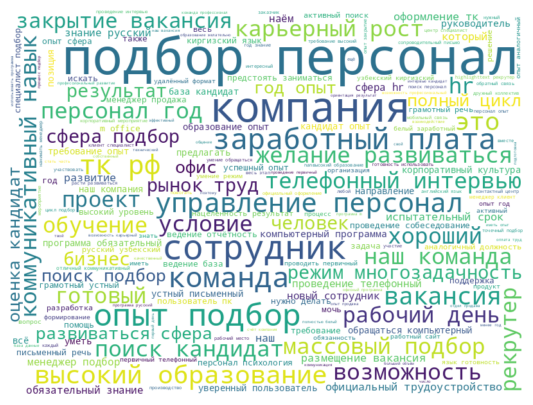

In [ ]:
# Объединение текста из всех строк в одну переменную
all_text = ' '.join(new_clear['text'].tolist())
all_text = all_text.lower()

# Токенизация, лемматизация и фильтрация стоп-слов для всего текста
all_tokens = tokenize_lemmatize_and_filter(all_text)

# Объединение токенов для создания облака слов
text_for_wordcloud = ' '.join(all_tokens)

WC(text_for_wordcloud)

In [ ]:
#список со специальными навыками рекрутера и распространенным офисным ПО
skills = [
    'huntflow', 'e-staff', 'хантфлоу', 'potok', 'поток',
    'битрикс', 'bitrix', ' 1c ', 'мониторинг_рынка_труда', 'мониторинг',
    'aнализ', 'google', 'amazon', 'яндекс', 'yandex',
    'поиск', 'интервью', 'тест', 'linkedin', 'xaбр',
    'hubr', 'telegram', 'телеграм', 'делопроизвод', 'учет', 'звонки',
    'basecamp', 'potok', 'zoom', 'google sheets', 'google analytics','miro','html',
    'google meet', 'jira', 'power bi', 'power point', 'powerbi', 'hubspot', 'excel',
    'google-таблиц', 'ms office', 'amocrm', 'crm', 'хедхантер', 'hh','headhunter',
    'soft skills', 'хантинг', 'hard skills','friendwork','сберподбор', 'ip-телефония',
    'гугл-таблиц', 'авито', 'соцсеть', 'cultural fit', 'x-ray', 'boolean','intermediate','fluent'
    'habrcareer', 'hrm', 'onboarding', 'offboarding', 'аутстафф','ejm','saas', 'it recruitment'
]

In [ ]:
# список с навыками IT (общего назначения)
# skills = [
#     'a/b testing', 'ab testing', 'actian', 'adobe analytics', 'adobe audience manager',
#     'adobe experience platform', 'adobe launch', 'adobe target', 'ai', 'airflow',
#     'alooma', 'alteryx', 'amazon machine learning', 'amazon web services', 'aml',
#     'amplitude', 'ansible', 'apache camel', 'apache nifi', 'apache spark',
#     'api', 'asana', 'auth0', 'aws', 'aws glue', 'azure', 'azure data factory',
#     'basecamp', 'bash', 'beats', 'big query', 'bigquery', 'birst', 'bitbucket',
#     'blendo', 'bootstrap', 'business objects bi', 'c#', 'c++', 'caffe', 'cassandra',
#     'cdata sync', 'chronograf', 'ci/cd', 'cicd', 'clickhouse', 'cloudera', 'cluvio',
#     'cntk', 'cognos', 'composer', 'computer vision', 'conda', 'confluence',
#     'couchbase', 'css', 'd3.js', 'dash', 'dashboard', 'data factory', 'data fusion',
#     'data mining', 'data studio', 'data warehouse', 'databricks', 'dataddo',
#     'dataflow', 'datahub', 'dataiku', 'datastage', 'dbconvert', 'dbeaver', 'dbt',
#     'deep learning', 'dl/ml', 'docker', 'domo', 'dune', 'dv360', 'dynamodb',
#     'elasticsearch', 'elt', 'erwin', 'etl', 'etleap', 'excel', 'facebook business manager',
#     'fivetran', 'fuzzy', 'ga360', 'gcp', 'gensim', 'ggplot', 'git', 'github', 'gitlab',
#     'google ads', 'google analytics', 'google cloud platform', 'google data flow',
#     'google optimize', 'google sheets', 'google tag manager', 'google workspace',
#     'grafana', 'hadoop', 'hana', 'hanagrafana', 'hbase', 'hdfs', 'hevo data', 'hightouch',
#     'hive', 'hivedatabricks', 'html', 'hubspot', 'ibm coremetrics', 'inetsoft',
#     'influxdb', 'informatica', 'integrate.io', 'iri voracity', 'izenda', 'java',
#     'java script', 'javascript', 'jenkins', 'jira', 'jmp', 'julia', 'jupyter',
#     'k2view', 'kafka', 'kantar', 'kapacitor', 'keras', 'kibana', 'kubernetes',
#     'lambda', 'linux', 'logstash', 'looker', 'lstm', 'luidgi', 'matillion', 'matlab',
#     'matplotlib', 'mendix', 'metabase', 'microsoft sql', 'microsoft sql server',
#     'microstrategy', 'miro', 'mixpanel', 'ml', 'ml flow', 'mlflow', 'mongodb', 'mxnet',
#     'mysql', 'natural nanguage processing', 'neo4j', 'nlp', 'nltk', 'nosql', 'numpy',
#     'oauth', 'octave', 'omniture', 'omnituregitlab', 'openshift', 'openstack',
#     'optimizely', 'oracle', 'oracle business intelligence', 'oracle data integrator',
#     'pandas', 'panorama', 'pentaho', 'plotly', 'postgre', 'postgresql', 'posthog',
#     'power amc', 'power bi', 'power point', 'powerbi', 'powerpivot', 'powerpoint',
#     'powerquery', 'pyspark', 'python', 'pytorch', 'pytorchhevo data', 'qlik',
#     'qlik sense', 'qlikview', 'querysurge', 'r', 'raphtory', 'rapidminer', 'redash',
#     'redis', 'redshift', 'retool', 'rivery', 'rust', 's3', 'sa360', 'salesforce', 'sap',
#     'sap business objects', 'sas', 'sas visual analytics', 'scala', 'scikit-learn',
#     'scipy', 'seaborn', 'segment', 'selenium', 'sem rush', 'semrush', 'shell', 'shiny',
#     'singer', 'sisense', 'skyvia', 'snowflake', 'spacy', 'spark', 'sparkml', 'splunk',
#     'spotfire', 'spreadsheet', 'spss', 'sql', 'ssis', 'sssr', 'stambia', 'statistics',
#     'statsbot', 'stitch', 'streamlit', 'streamsets', 'svn', 't-sql', 'tableau', 'talend',
#     'targit', 'tealium', 'telegraf', 'tensorflow', 'terraapi', 'terraform', 'theano',
#     'thoughtspot', 'timeseries', 'trello', 'unix', 'vba', 'vtom', 'webfocus', 'wfh',
#     'xplenty', 'xtract.io', 'yellowfin'
# ]

In [ ]:
#функция, которая находит навыки в описании к вакансии
def skills_finder(cell, skill_list_2=skills):
    matched_skills_list=[]
    for i in skill_list_2:
        if i == 'c++':
            if re.search('\Wc\+\+\W', cell.lower()):
                matched_skills_list.append(i)
        # word_border + rewritten "i" in special symbols + word_border
        else:
            pattern = (
            r'(\b|\W)'
            + re.escape(i)
            + r'(\b|\W)'
            +'|'
            + r'(\b|\W)'
            +re.escape(i.replace(' ', ''))
            + r'(\b|\W)')
        if re.search(pattern, cell.lower()):
            matched_skills_list.append(i)
    return matched_skills_list

In [ ]:
#применим нашу функцию с поиском скиллов на весь столбец, а результат появится в новом столбце
new_clear['skills_clear'] = new_clear['text'].apply(lambda x: skills_finder(x))

In [ ]:
new_clear['skills_clear'].value_counts()

skills_clear
[]                                 443
[интервью]                         156
[поиск]                             91
[поиск, интервью]                   84
[ms office]                         22
                                  ... 
[potok, поиск, интервью, potok]      1
[onboarding, offboarding]            1
[excel, crm]                         1
[e-staff, поиск, excel]              1
[мониторинг, звонки, hh, авито]      1
Name: count, Length: 278, dtype: int64

In [ ]:
new_clear['skills_clear'].fillna('ничего')

16519    [поиск, интервью]
34371           [интервью]
39474       [potok, potok]
20219                   []
2528            [интервью]
               ...        
37116                   []
32316                   []
10911    [поиск, интервью]
39694                   []
37894           [интервью]
Name: skills_clear, Length: 1364, dtype: object

In [ ]:
all_text =np.hstack(new_clear['skills_clear'].tolist())
new_text =' '.join(all_text.tolist())

In [ ]:
new_text

'поиск интервью интервью potok potok интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью интервью яндекс интервью интервью ms office яндекс интервью яндекс интервью x-ray boolean yandex интервью ms office интервью ms office поиск hh интервью интервью интервью интервью hh excel ms office ms office интервью zoom ms office поиск поиск интервью headhunter интервью amocrm e-staff google поиск интервью ms office поиск битрикс поиск bitrix  1c  ms office мониторинг поиск интервью мониторинг поиск интервью интервью e-staff поиск поиск интервью поиск интервью поиск поиск интервью excel поиск интервью e-staff интервью excel crm soft skills hard skills поиск интервью soft skills хантинг hard skills мониторинг поиск интервью excel мониторинг поиск excel ms office excel мониторинг поиск интервью поиск интервью поиск интервью поиск интервью soft skills поиск интерв

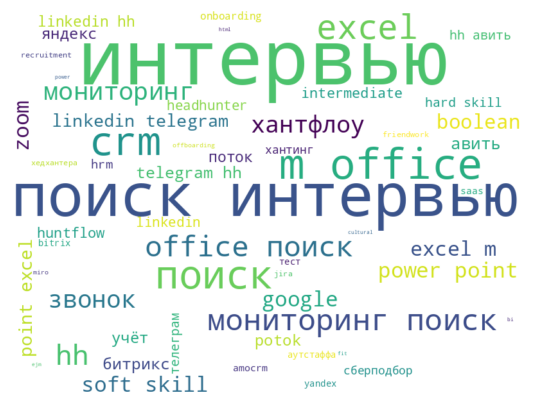

In [ ]:
# Объединение текста из всех строк в одну переменную
#all_text = (new_clear['skills_clear'].tolist())
#new_text = new_text.lower()

# Токенизация, лемматизация и фильтрация стоп-слов для всего текста
all_tokens1 = tokenize_lemmatize_and_filter(new_text)

# Объединение токенов для создания облака слов
text_for_wordcloud1 = ' '.join(all_tokens1)

WC(text_for_wordcloud1)

## Сортировка для выгрузки по критериям пользователя

In [ ]:
junior_list = [ 'младш','jun','джун','начинающ','джун', 'помощ', 'помош', 'начин', "ассист", 'стажи', 'стажё', 'j.', 'без опыта', 'стажер', 'подработк']

In [ ]:
mass_list = ['массов','вахт','грузч','курьер','продав','фасовщ','комплекто']

In [ ]:
remote_list = [ 'возможна удаленка','или удален','полностью удал', 'есть удал', 'в удаленном формате', 'удаленный формат']

In [ ]:
new_clear['junior_list'] = new_clear['title'].str.contains('|'.join(junior_list), na=False)
new_clear.insert(10, 'junior_list', new_clear.pop('junior_list'))


In [ ]:
new_clear['remote_list'] = new_clear['description'].str.contains('|'.join(remote_list), na=False)
new_clear.insert(11, 'remote_list', new_clear.pop('remote_list'))


In [ ]:
new_clear['mass_list'] = new_clear['text'].str.contains('|'.join(mass_list), na=False)
new_clear.insert(12, 'mass_list', new_clear.pop('mass_list'))


In [ ]:
new_clear['mass_list'].value_counts()

mass_list
False    1038
True      326
Name: count, dtype: int64

In [ ]:
new_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 16519 to 37894
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1364 non-null   object 
 1   company        1364 non-null   object 
 2   format         1364 non-null   object 
 3   location       1364 non-null   object 
 4   salary_from    873 non-null    float64
 5   salary_to      444 non-null    float64
 6   source         1364 non-null   object 
 7   link           1364 non-null   object 
 8   date           1364 non-null   object 
 9   company_field  217 non-null    object 
 10  junior_list    1364 non-null   bool   
 11  remote_list    1364 non-null   bool   
 12  mass_list      1364 non-null   bool   
 13  description    1364 non-null   object 
 14  skills         1364 non-null   object 
 15  job_type       1364 non-null   object 
 16  text           1364 non-null   object 
 17  skills_clear   1364 non-null   object 
dtypes: bool(

In [ ]:
new_clear.sample(5)

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,junior_list,remote_list,mass_list,description,skills,job_type,text,skills_clear
36003,менеджер по подбору персонала (удаленно),Стройкомплект,Полный день,Екатеринбург,60000.0,NaN,hh,https://hh.ru/vacancy/89762302,2024-04-25,NaN,False,False,False,nan,образование высшее (желательно управление перс...,Полная занятость,nanобразование высшее (желательно управление п...,[]
14435,менеджер по персоналу (рекрутер),ENGERTA,Полный день,Москва,80000.0,NaN,hh,https://hh.ru/vacancy/95907023,2024-04-28,NaN,False,False,False,nan,"человек с грамотной устной и письменной речью,...",Полная занятость,nanчеловек с грамотной устной и письменной реч...,[excel]
45125,менеджер по подбору персонала,Завод электростанций РЕСУРС,Полный день,Самара,50000.0,50000.0,hh,https://hh.ru/vacancy/97746711,2024-04-29,NaN,False,False,False,nan,ориентированность на результат. высшее професс...,Частичная занятость,nanориентированность на результат. высшее проф...,[]
3979,специалист по массовому набору персонала,Kaspi.kz,Полный день,Алматы,NaN,NaN,hh,https://hh.ru/vacancy/96382783,2024-04-26,NaN,False,False,True,в настоящий момент мы находимся в поиске специ...,огромное желание начать карьеру в рекрутинге. ...,Полная занятость,в настоящий момент мы находимся в поиске специ...,"[поиск, интервью]"
10303,специалист по подбору персонала,Правительство Москвы,Полный день,Москва,NaN,NaN,hh,https://hh.ru/vacancy/97810332,2024-04-27,NaN,False,False,False,работа в правительстве москвы — это возможност...,высшее образование (направления «управление пе...,Полная занятость,работа в правительстве москвы — это возможност...,"[e-staff, мониторинг, интервью]"


In [ ]:
for_me = new_clear.query('junior_list == False')
# function_worldcloud(text_low_popularity)

In [ ]:
for_me.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1099 entries, 16519 to 37894
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1099 non-null   object 
 1   company        1099 non-null   object 
 2   format         1099 non-null   object 
 3   location       1099 non-null   object 
 4   salary_from    670 non-null    float64
 5   salary_to      383 non-null    float64
 6   source         1099 non-null   object 
 7   link           1099 non-null   object 
 8   date           1099 non-null   object 
 9   company_field  87 non-null     object 
 10  junior_list    1099 non-null   bool   
 11  remote_list    1099 non-null   bool   
 12  mass_list      1099 non-null   bool   
 13  description    1099 non-null   object 
 14  skills         1099 non-null   object 
 15  job_type       1099 non-null   object 
 16  text           1099 non-null   object 
 17  skills_clear   1099 non-null   object 
dtypes: bool(

In [ ]:
for_me1 = for_me.query('mass_list == False')
# function_worldcloud(text_low_popularity)

In [ ]:
for_me1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 16519 to 37894
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          849 non-null    object 
 1   company        849 non-null    object 
 2   format         849 non-null    object 
 3   location       849 non-null    object 
 4   salary_from    491 non-null    float64
 5   salary_to      278 non-null    float64
 6   source         849 non-null    object 
 7   link           849 non-null    object 
 8   date           849 non-null    object 
 9   company_field  69 non-null     object 
 10  junior_list    849 non-null    bool   
 11  remote_list    849 non-null    bool   
 12  mass_list      849 non-null    bool   
 13  description    849 non-null    object 
 14  skills         849 non-null    object 
 15  job_type       849 non-null    object 
 16  text           849 non-null    object 
 17  skills_clear   849 non-null    object 
dtypes: bool(3

In [ ]:
# for_me2 = for_me.query('remote_list == True' and 'format == ''Удаленная работа''')
# # function_worldcloud(text_low_popularity)

In [ ]:
# for_me1 = for_me.query(''Удаленная работа' in format')
# # function_worldcloud(text_low_popularity)

In [ ]:
# for_me1=for_me.query('format == ["Удаленная работа", "b", "c"]')

In [ ]:
for_me2 = for_me1.query('remote_list == True' and 'format == ["Удаленная работа", "b", "c"]')
# function_worldcloud(text_low_popularity)

In [ ]:
for_me2.sample()

,title,company,format,location,salary_from,salary_to,source,link,date,company_field,junior_list,remote_list,mass_list,description,skills,job_type,text,skills_clear
30829,менеджер по подбору персонала (it-рекрутер),Группа СВЭЛ,Удаленная работа,Тюмень,60000.0,90000.0,hh,https://hh.ru/vacancy/98086472,2024-04-27,NaN,False,False,False,группа свэл – один из ведущих производителей э...,"высшее образование (в приоритете - психология,...",Полная занятость,группа свэл – один из ведущих производителей э...,[hrm]


In [ ]:
#проверим эти строки
for_me2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 39474 to 10911
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          190 non-null    object 
 1   company        190 non-null    object 
 2   format         190 non-null    object 
 3   location       190 non-null    object 
 4   salary_from    125 non-null    float64
 5   salary_to      84 non-null     float64
 6   source         190 non-null    object 
 7   link           190 non-null    object 
 8   date           190 non-null    object 
 9   company_field  6 non-null      object 
 10  junior_list    190 non-null    bool   
 11  remote_list    190 non-null    bool   
 12  mass_list      190 non-null    bool   
 13  description    190 non-null    object 
 14  skills         190 non-null    object 
 15  job_type       190 non-null    object 
 16  text           190 non-null    object 
 17  skills_clear   190 non-null    object 
dtypes: bool(3

In [ ]:
from datetime import date
from google.colab import drive
drive.mount("/content/drive")
for_me2.to_csv (f'/content/drive/MyDrive/parsers/recruiter_clean_{date.today()}.csv', index = None, header=True,  encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#FINISH
